## Problem Statement -

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

## Hypothesis - 
    
    1. Income group high or low. If income is high / low do loan get approved or not
    2. employment nature of applicant.
    3. Credit History of applicant - if Credit_History is good their is high chance of getting Loan Approved.
    4. Loan Amount applied for loan - if Loan Amount less / small then chances are high for Loan Approved.
    5. Lesser the amount repay monthly, higher the chances for Loan Approved.
    6. for how many Terms loan required- if term of loan is shorter, the chances of loan get approved is high.

# IMPORTING LIBARIES

In [1]:
import pandas as pd
import numpy as np # for mathematical calculation
import matplotlib.pyplot as plt # for plotting graphs 
%matplotlib inline
import seaborn as sns # for data visiualization

from sklearn.model_selection import train_test_split # importing libariry for splitting daataframe into train_test
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold # import Startified K-Fold model from sklearn
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

import warnings # to ingonre warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("C:/Users/sharmila_biyani/Documents/Analytics_Vidya/Loan Prediction Project/Loan_train.csv")
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
test = pd.read_csv("C:/Users/sharmila_biyani/Documents/Analytics_Vidya/Loan Prediction Project/Loan_test.csv")
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

In [5]:
df1 = train.copy()
df2 = test.copy()

In [6]:
df1.columns
# df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
df1.shape, df2.shape

((614, 13), (367, 12))

In [9]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Univariate Analysis

# Target Variable - Loan Status

In [10]:
# normalization is True which print Loan Status propertionate 
df1["Loan_Status"].value_counts(normalize = True)

# Normalization means the total propertinate / share in 100% of particular value

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

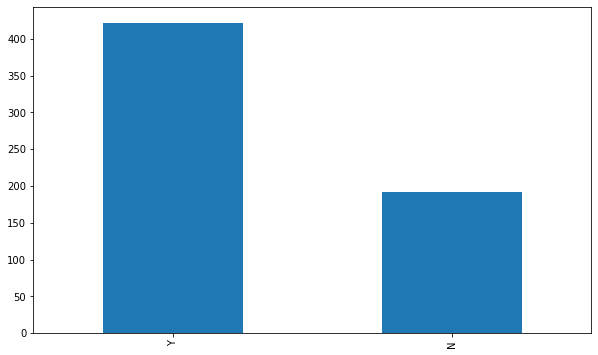

In [11]:
# Plotting bargraph for target variable
df1["Loan_Status"].value_counts(normalize = False).plot.bar(figsize = (10,6))

# Independent Variables (Categorical Variables)

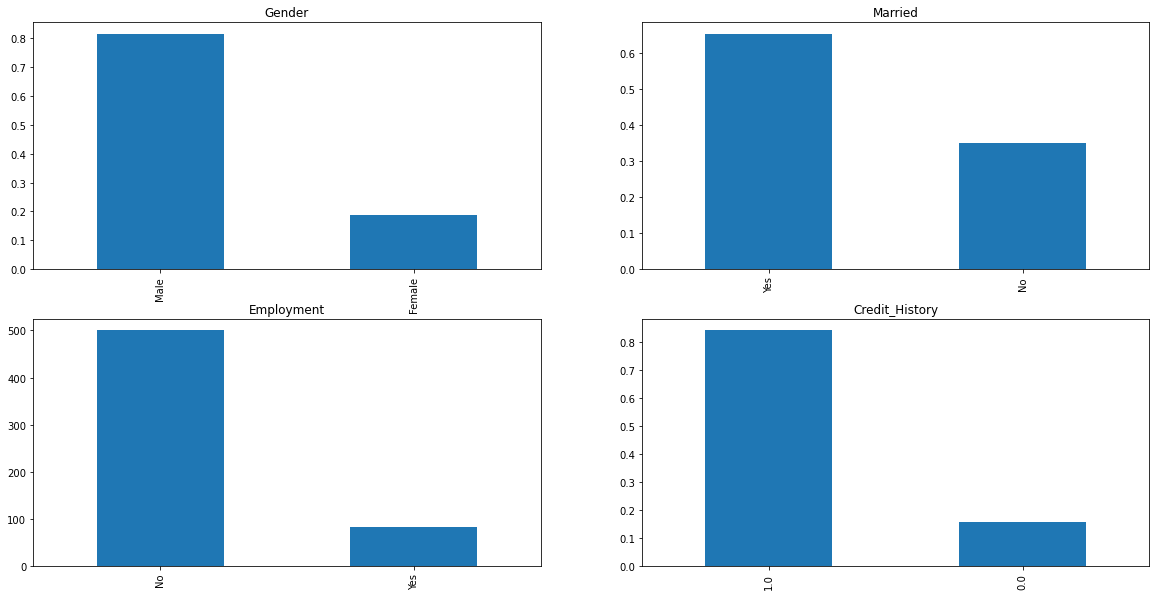

In [12]:
plt.figure(1)
plt.subplot(221)
df1["Gender"].value_counts(normalize = True).plot.bar(title = "Gender")
plt.subplot(222) 
df1.Married.value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223) 
df1["Self_Employed"].value_counts().plot.bar(title = "Employment")
plt.subplot(224)
df1.Credit_History.value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Credit_History")

plt.show()

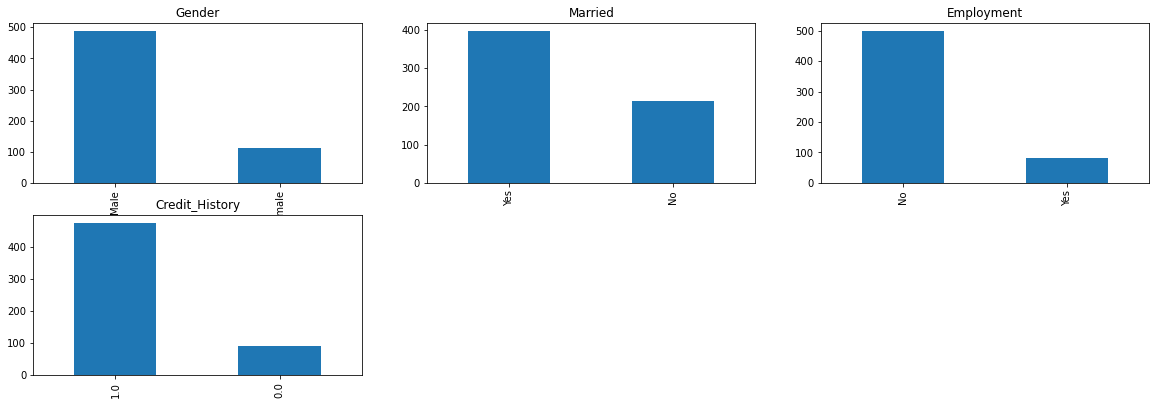

In [13]:
plt.figure(1)
plt.subplot(331)
df1["Gender"].value_counts().plot.bar(figsize = (20,10), title = "Gender")
plt.subplot(332) 
df1.Married.value_counts().plot.bar(title = 'Married')
plt.subplot(333) 
df1["Self_Employed"].value_counts().plot.bar(title = "Employment")
plt.subplot(334)
df1.Credit_History.value_counts().plot.bar(title = "Credit_History")

plt.show()

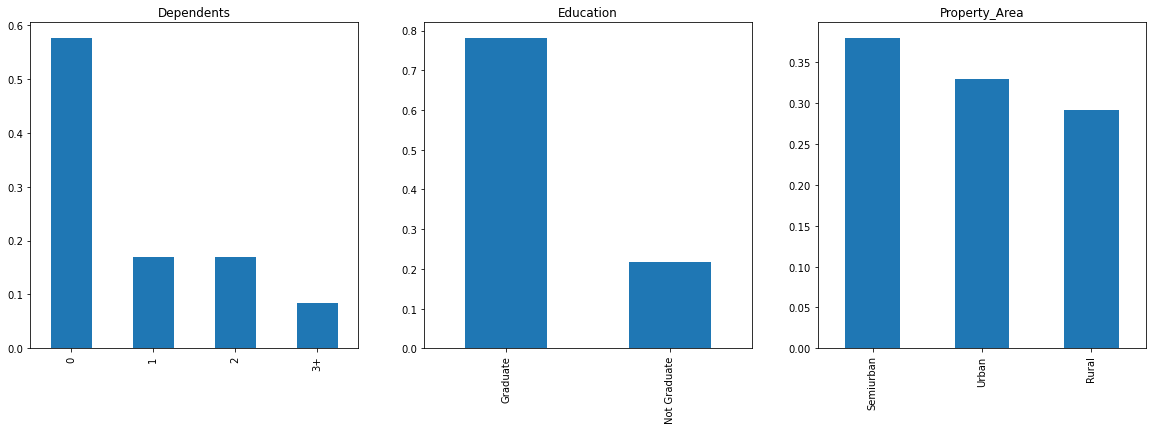

In [14]:
plt.figure(1)
plt.subplot(131) 
df1.Dependents.value_counts(normalize = True).plot.bar(figsize=(20,6), title = 'Dependents')
plt.subplot(132) 
df1.Education.value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
df1.Property_Area.value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

OBSERVATIONS -

    1. On the basis of Dependents, about 57%, i.e., 345 applicants doesn't have any dependents are most while about 9%,i.e., 51 applicants are having 3+ dependents are least.
        while 1 dependent & 2 dependent borrower are arount 17% each. But had no dependents borrowered or applied  highest in all.
        
    2. On the Basis of Education, 78% ,i.e., 480 applicants are Graduate while 22% ,i.e., 134 applicants are non-Graduate.
        Graduate applicants are applied for loan are higher than Non-Graduate.
        
    3. On the basis of Property Area, Semi-Urban contributes about 38%, which are highest as compared to other areas, i.e., Urban (33%), & Rural (29%) respectively
    

# Independent Variable (Numerical)

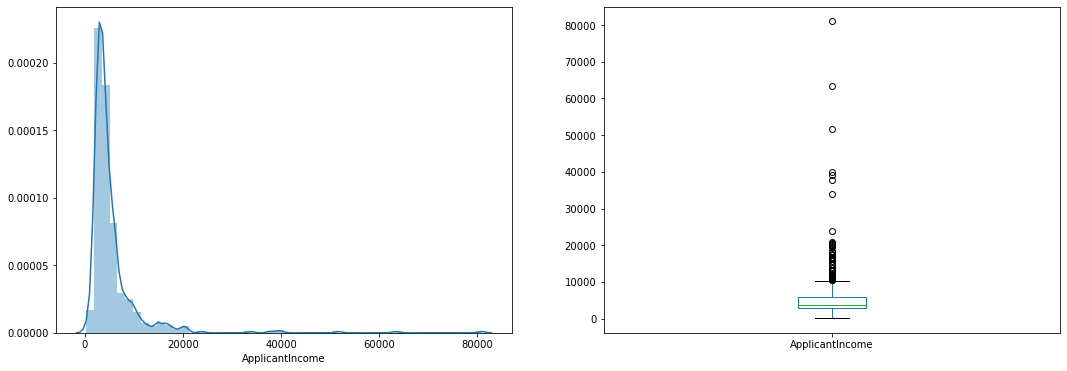

In [15]:
# Applicant Income

plt.figure(1)
plt.subplot(121)
sns.distplot(df1.ApplicantIncome)
plt.subplot(122)
df1.ApplicantIncome.plot.box(figsize = (18,6))
plt.show()

Text(0.5, 0.98, ' ')

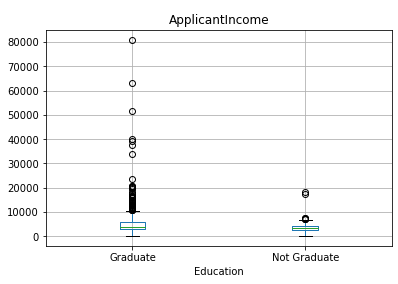

In [16]:
plt.figsize = (20,9)
df1.boxplot(column = "ApplicantIncome", by = "Education", vert = True)
plt.suptitle(" ")

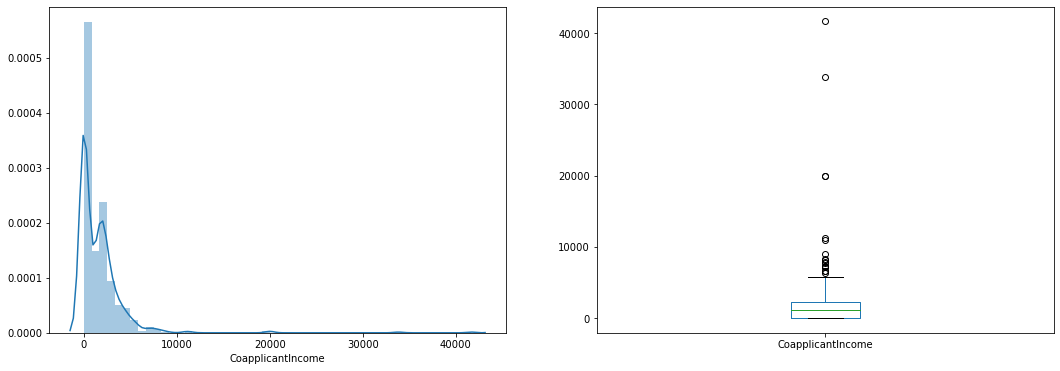

In [17]:
# Coapplicants Income Distributions

plt.subplot(121)
sns.distplot(df1.CoapplicantIncome)
plt.subplot(122)
df1.CoapplicantIncome.plot.box(figsize = (18,6))
plt.show()

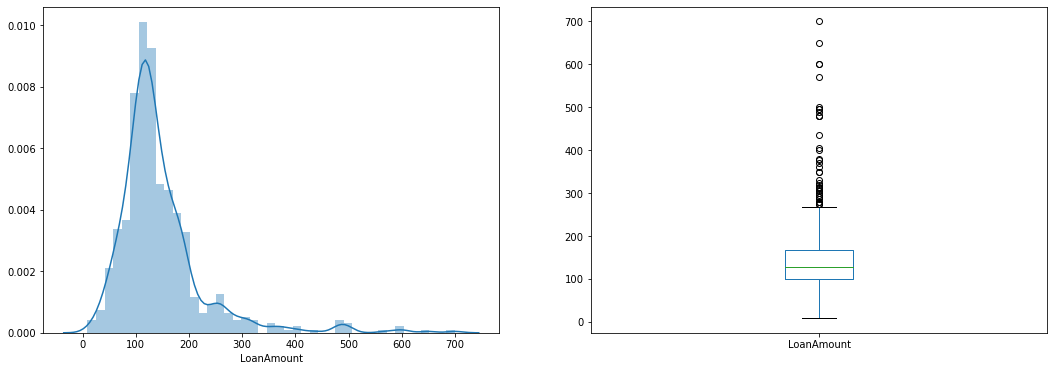

In [18]:
# Distribution of Loan Amounts

plt.subplot(121)
sns.distplot(df1.LoanAmount)
plt.subplot(122)
df1.LoanAmount.plot.box(figsize = (18,6))
plt.show()

    # from following plot we see their are a lot of outliers and distribution is fairly normal.

# BIVARIANTE ANALYSIS

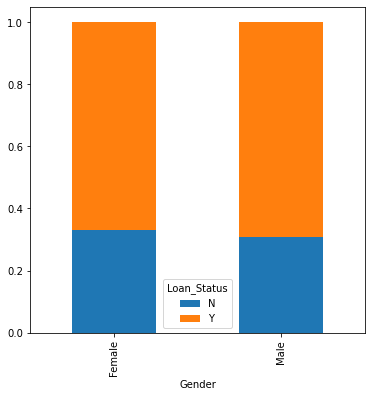

In [19]:
Gender1 = pd.crosstab(df1.Gender, df1.Loan_Status)
Gender1.div(Gender1.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (6,6))


    # The proportion of male and female applicants is 
        # for approval is 69% & 67% respectively   
        # for unapproval is 31% & 33% respectively

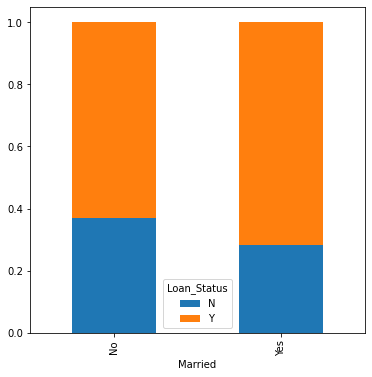

In [20]:
Married1 = pd.crosstab(df1.Married, df1.Loan_Status)
Married1.div(Married1.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (6,6))

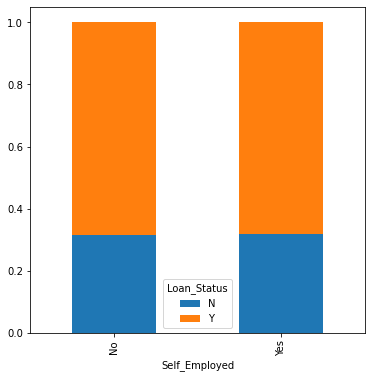

In [21]:
self_emp1 = pd.crosstab(df1.Self_Employed, df1.Loan_Status)
self_emp1.div(self_emp1.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize = (6,6))

# from following plot nothing can be inferred as such.

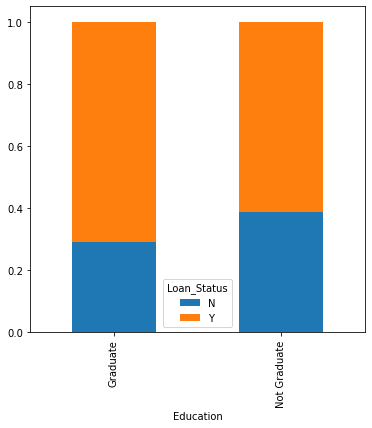

In [22]:
edu = pd.crosstab(df1.Education, df1.Loan_Status)
edu.div(edu.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,6))
    
    # around 70% loan approved for graduates while around 30% unapproved.
    # around 62% loan approved while 38% unapproved for non-graduate.

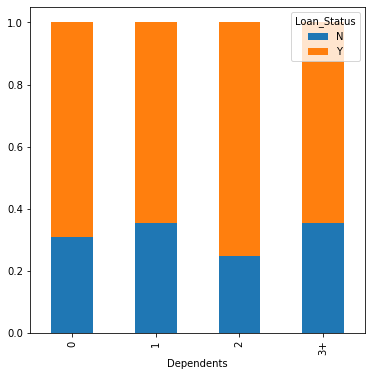

In [23]:
depen = pd.crosstab(df1.Dependents, df1.Loan_Status)
depen.div(depen.sum(1).astype(float), axis =0).plot(kind ='bar', stacked = True, figsize = (6,6))


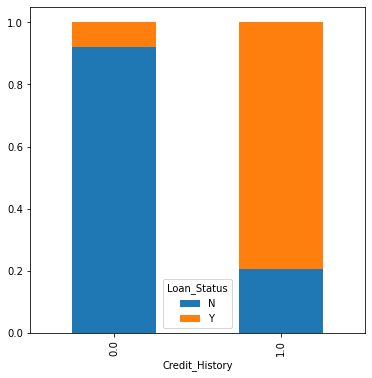

In [24]:
cr_his = pd.crosstab(df1.Credit_History, df1.Loan_Status)
cr_his.div(cr_his.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (6,6))


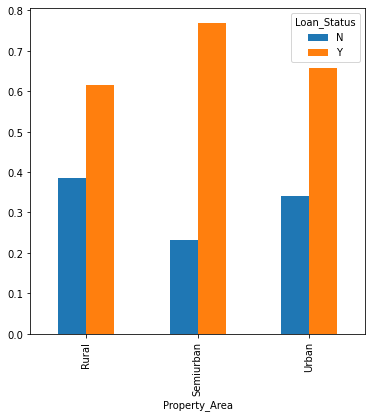

In [25]:
pro_area = pd.crosstab(df1.Property_Area, df1.Loan_Status)
pro_area.div(pro_area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, figsize = (6,6))

    # Proportionately Semi-Urban area was having highest approval as comared to that in Rural & Urban areas

# Numerical Independent Variable vs Target Variable

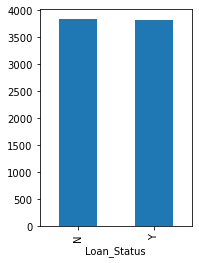

In [26]:
plt.figure(1)
# plt.subplot(121)
# df1.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(figsize = (12,6))
plt.subplot(122)
df1.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar()
plt.show()
    # median value can treat on outlier values in datasets.

In [27]:
applicant_income = df1.ApplicantIncome.median()
applicant_income

3812.5

In [28]:
avg_appliIncome = df1.ApplicantIncome.mean()
avg_appliIncome

5403.459283387622

Text(0, 0.5, 'Percentage')

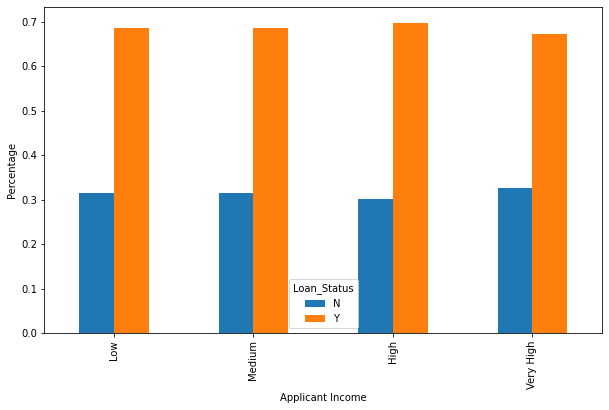

In [29]:
bins = [0, 2500, 5000, 10000, 50000]
group = ['Low','Medium','High','Very High']
df1['income_bin'] = pd.cut(df1.ApplicantIncome, bins, labels = group)
# df1.income_bin.value_counts()

i_bin = pd.crosstab(df1.income_bin, df1.Loan_Status)
i_bin.div(i_bin.sum(1).astype(float), axis = 0).plot(kind ="bar", stacked = False, figsize = (10,6))
plt.xlabel("Applicant Income")
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

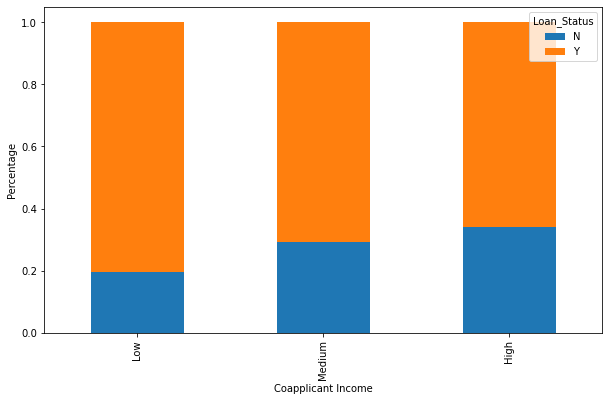

In [30]:
# Coapplicants Income vs. Loan Status

bins = [0,1500, 4500, 35000]
group = ['Low','Medium','High']
df1['coapp_income_bin'] = pd.cut(df1.CoapplicantIncome, bins, labels = group)

coapp_bin = pd.crosstab(df1.coapp_income_bin, df1.Loan_Status)
coapp_bin.div(coapp_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Coapplicant Income")
plt.ylabel('Percentage')


Text(0, 0.5, ' % value')

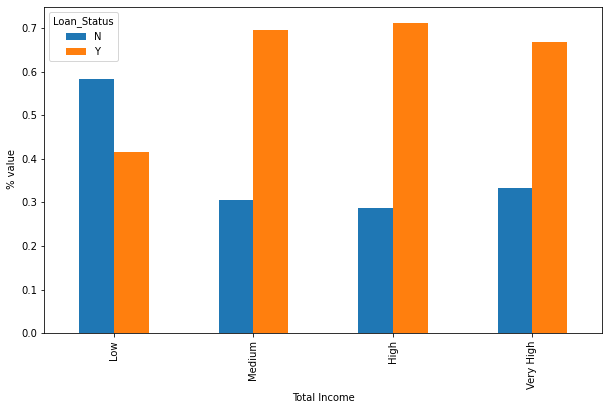

In [31]:
# Creation of Total Income

df1["Total_Income"] =  df1["ApplicantIncome"] + df1["CoapplicantIncome"]

bins = [0, 2500, 5000, 10000, 50000]
group = ['Low','Medium','High','Very High']
df1['total_income_bin'] = pd.cut(df1.Total_Income, bins, labels = group)

total_bin = pd.crosstab(df1.total_income_bin, df1.Loan_Status)
total_bin.div(total_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, figsize = (10,6))
plt.xlabel("Total Income")
plt.ylabel(' % value')

#  The proportion ofloans getting approved for low total income is very low as compared to Medium, High and Very High Income.

Text(0, 0.5, 'percentage')

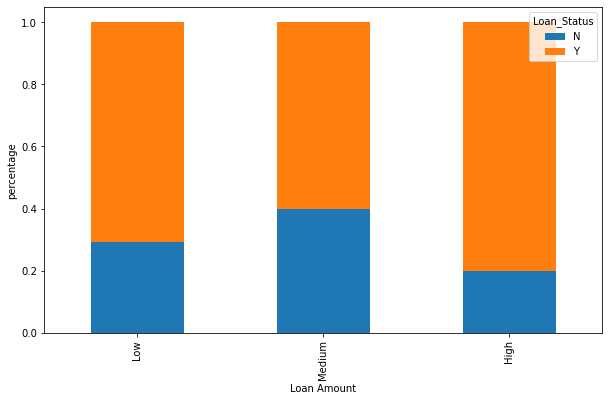

In [36]:
# Loan Amount Visualization

bins = [0,200,500,1000]
group = ['Low', 'Medium', 'High']
df1['loan_amount_bin'] = pd.cut(df1["LoanAmount"], bins, labels = group)

loan_bin = pd.crosstab(df1['loan_amount_bin'], df1['Loan_Status'])
loan_bin.div(loan_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Loan Amount")
plt.ylabel("percentage")

Text(0, 0.5, 'Number of Applicant')

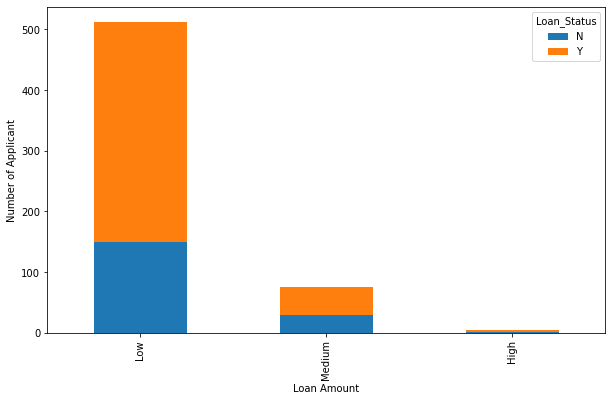

In [32]:
bins = [0,200,500,1000]
group = ['Low', 'Medium', 'High']
df1['loan_amount_bin'] = pd.cut(df1["LoanAmount"], bins, labels = group)

loan_bin = pd.crosstab(df1['loan_amount_bin'], df1['Loan_Status'])
loan_bin.mod(loan_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Loan Amount")
plt.ylabel("Number of Applicant")

In [33]:
df1 = df1.drop(['income_bin', 'coapp_income_bin', 'loan_amount_bin', 'total_income_bin'], axis = 1)

In [34]:
df1 = df1.drop(['Total_Income'], axis = 1)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
# Converting Loan_Status into Binary form

def loan_stat(loan):
    if loan == 'N':
        return 0
    else:
        return 1
df1["Loan_Status"] = df1["Loan_Status"].map(loan_stat).astype(float)

In [36]:
# Converting 3+ Dependents into 3
df1['Dependents'].replace('3+', 3, inplace = True)
df2['Dependents'].replace('3+', 3, inplace = True)

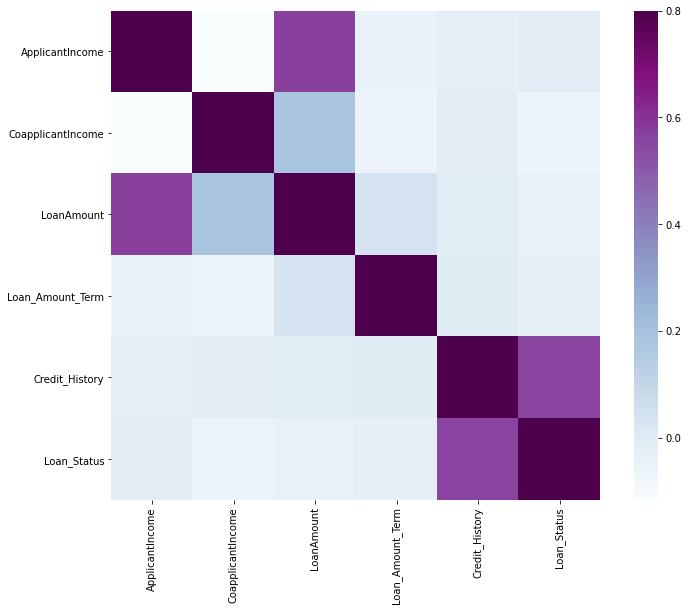

In [37]:
# Correlation between all Numerical variables
# Visualizing it in Heatmap

matrix = df1.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = 'BuPu')

# MISSING VALUE & OUTLIER TREATMENT

# Missing Value Treatment

In [38]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# Filling null value with mode in categorical variance and median in numeric variance in df1(Train dataset)

df1['Gender'].fillna(df1['Gender'].mode()[0], inplace = True)
df1['Married'].fillna(df1['Married'].mode()[0], inplace = True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace = True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace = True)
df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace = True)

# Filling missing values in df2(Test)

df2['Gender'].fillna(df2['Gender'].mode()[0], inplace = True)
df2['Married'].fillna(df2['Married'].mode()[0], inplace = True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0], inplace = True)
df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0], inplace = True)
df2['Credit_History'].fillna(df2['Credit_History'].mode()[0], inplace = True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode()[0], inplace = True)
df2['LoanAmount'].fillna(df2['LoanAmount'].median(), inplace = True)

df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatement

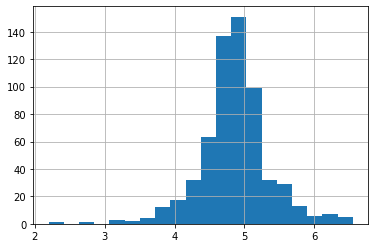

In [41]:
# Log transformation for train (df1)

df1['LoanAmount_log'] = np.log(df1['LoanAmount'])
df1['LoanAmount_log'].hist(bins = 20)

In [42]:
# Log Transformation for test(df2)

df2['LoanAmount_log'] = np.log(df2['LoanAmount'])

# MODEL BUILDING

In [43]:
# Dropping Loan_ID from both train (df1) & test (df2)

df1 = df1.drop(['Loan_ID'], axis = 1)
df2 = df2.drop(['Loan_ID'], axis = 1)

In [44]:
# Dropping target variable from train (df1) & saving as 'y'

X = df1.drop(['Loan_Status'], 1)
y = df1.Loan_Status

In [45]:
# Creating Dummy dataframe of train (df1) & test (df2)

X = pd.get_dummies(X)
df1 = pd.get_dummies(df1)
df2 = pd.get_dummies(df2)

In [46]:
# train - test split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [49]:
# Logistic Regression

# creating Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# LogisticRegression(penalty='l1',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
#                    class_weight=None, random_state=None, solver='lib', max_iter=100, multi_class='auto', 
#                    verbose=0, warm_start=False, n_jobs=1)

LogisticRegression()

In [50]:
# Predict Loan_Status for validation and calculate accuracy

pred_cv = log_reg.predict(x_cv) # predicting x_cross_validation

accuracy_cv = accuracy_score(y_cv, pred_cv) # calculating accuracy score
print(accuracy_cv)

# from output, our accuracy is 0.7950 accurate which means we have identified around 80% of the Loan Status correctly

0.7945945945945946


In [51]:
# predict for test dataframe

pred_test = log_reg.predict(df2)

# import submission file

submission = pd.read_csv("C:/Users/sharmila_biyani/Documents/Analytics_Vidya/Loan Prediction Project/Loan_sample_submission.csv")

# filling Loan_ID & Loan_Status columns with Loan_Id of test dataset and predictions, i.e., pred_test respectively

submission['Loan_Status'] = pred_test
submission["Loan_ID"] = test['Loan_ID']

# converting prediction from 1 & 0 to Y & N
submission["Loan_Status"].replace(0, "N", inplace = True)
submission["Loan_Status"].replace(1, "Y", inplace = True)

submission

# converting submission to csv format file
pd.DataFrame(submission, columns = ["Loan_ID", 'Loan_Status']).to_csv("LoanStatus.csv")

# Startified k-Fold

In [54]:
# Created a cross validation logistic model with startified 4 Fold & make prediction for test dataset

i = 3
skf = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kFold {}'.format(i,skf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    model = LogisticRegression(random_state = 1) # Creating model for logistic regression
    model.fit(xtr, ytr) # model fiting
    pred_test = model.predict(xvl) # predicting x_validation
    score = accuracy_score(yvl, pred_test) # calculating accuracy score for y_validation
    print('accuracy_score', score)
    i += 3 
    pred_test = model.predict(df2)
    pred = model.predict_proba(xvl)[:, 1]
    
# mean validation accuracy is 0.80 %


3 of kFold 5
accuracy_score 0.8048780487804879

6 of kFold 5
accuracy_score 0.8373983739837398

9 of kFold 5
accuracy_score 0.7804878048780488

12 of kFold 5
accuracy_score 0.7886178861788617

15 of kFold 5
accuracy_score 0.7950819672131147


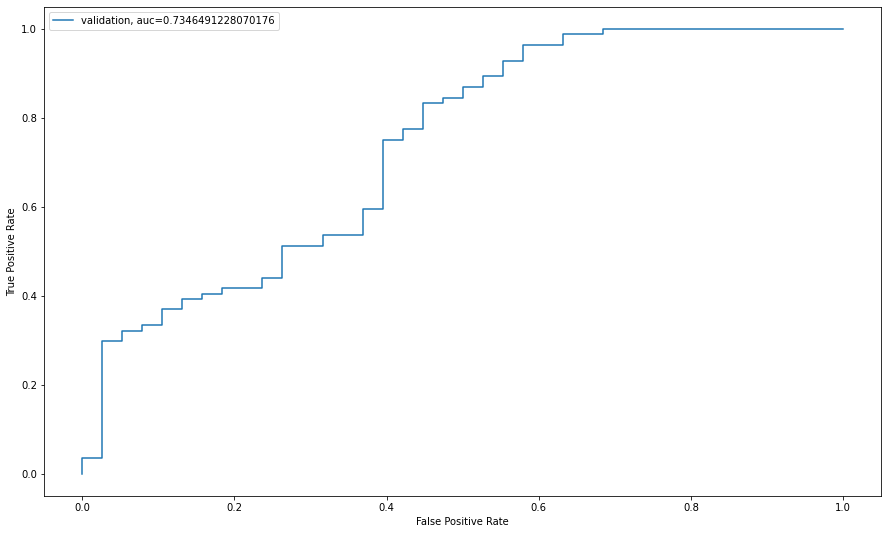

In [55]:
# Visualizing ROC Curve

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (15,9))
plt.plot(fpr, tpr, label = "validation, auc="+ str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 2)
plt.show()

# AUC value 0.73
# pos_label = 'Y' , if run into error

In [56]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test["Loan_ID"]

# converting 1 & 0  to Y and N
submission["Loan_Status"].replace(0,'N', inplace = True)
submission["Loan_Status"].replace(1,'Y', inplace = True)

# converting to csv file
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("LoanStatus_kfold.csv")


# Feature Engineering

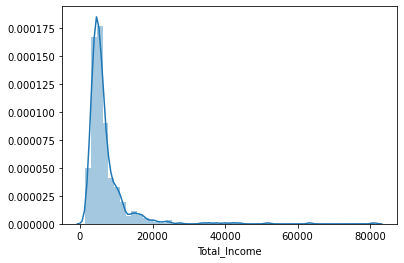

In [57]:
# creating Total_Income while adding ApplicantIncome & CoapplicantIncome

df1['Total_Income'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df2['Total_Income'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']

# Plotting Total_Income
sns.distplot(df1['Total_Income'])

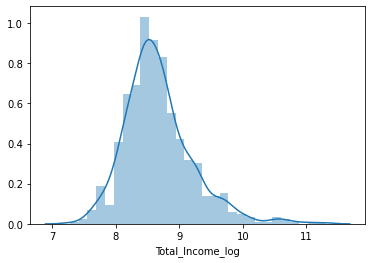

In [58]:
# above plot is right skewed
# Log transformation to make normal distribution

df1["Total_Income_log"] = np.log(df1['Total_Income'])
df2["Total_Income_log"] = np.log(df2['Total_Income'])

# plotting log transformerd Total Income
sns.distplot(df1['Total_Income_log'])

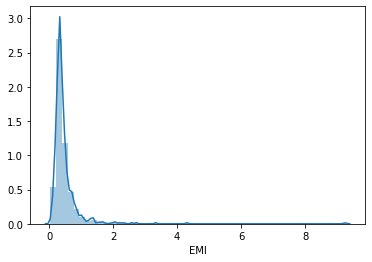

In [59]:
# Creating EMI Feature

df1["EMI"] = df1["LoanAmount"] / df1["Loan_Amount_Term"]
df2["EMI"] = df2["LoanAmount"] / df2["Loan_Amount_Term"]

# plotting EMI
sns.distplot(df1['EMI'])

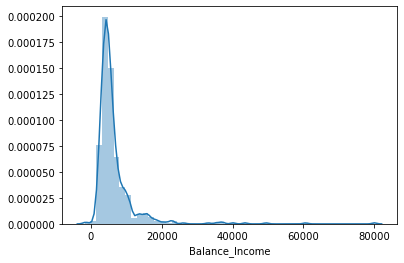

In [60]:
# Creating Balance Income Feature

df1['Balance_Income'] = df1['Total_Income'] - (df1['EMI']*1000) # multiping with 1000 to make units equal
df2['Balance_Income'] = df2['Total_Income'] - (df2['EMI']*1000)

sns.distplot(df1['Balance_Income'])


In [61]:
# Removing correlated variables which were used to create new features above -

df1 = df1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
df2 = df2.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

# MODEL BUILDING - II

In [62]:
X = df1.drop('Loan_Status', 1)
y = df1.Loan_Status

# 1. Logistic Forest Model

In [70]:
i = 1
skf = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kFold {}'.format(i,skf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state = 1) # Creating model for logistic regression
    model.fit(xtr, ytr) # model fiting
    pred_test = model.predict(xvl) # predicting x_validation
    score = accuracy_score(yvl, pred_test) # calculating accuracy score for y_validation
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(df2)
    pred = model.predict_proba(xvl)[:, 1]
    
    
# mean validation accuracy is 0.7231


1 of kFold 5
accuracy_score 0.7967479674796748

2 of kFold 5
accuracy_score 0.6910569105691057

3 of kFold 5
accuracy_score 0.6666666666666666

4 of kFold 5
accuracy_score 0.7804878048780488

5 of kFold 5
accuracy_score 0.680327868852459


In [71]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test["Loan_ID"]

# converting 1 & 0  to Y and N
submission["Loan_Status"].replace(0,'N', inplace = True)
submission["Loan_Status"].replace(1,'Y', inplace = True)

# converting to csv file
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("Logistic.csv")


# 2. Decision Tree Model

In [72]:
from sklearn import tree
i = 1
skf = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kFold {}'.format(i,skf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state = 1) # Creating model for Decision Tress
    model.fit(xtr, ytr) # model fiting
    pred_test = model.predict(xvl) # predicting x_validation
    score = accuracy_score(yvl, pred_test) # calculating accuracy score for y_validation
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(df2)
    # pred = model.predict_proba(xvl)[:, 1]

    
# mean validation accuracy is 0.7149


1 of kFold 5
accuracy_score 0.7398373983739838

2 of kFold 5
accuracy_score 0.6991869918699187

3 of kFold 5
accuracy_score 0.7560975609756098

4 of kFold 5
accuracy_score 0.7073170731707317

5 of kFold 5
accuracy_score 0.6721311475409836


In [73]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test["Loan_ID"]

# converting 1 & 0  to Y and N
submission["Loan_Status"].replace(0,'N', inplace = True)
submission["Loan_Status"].replace(1,'Y', inplace = True)

# converting to csv file
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("Decision_Tree.csv")


# 3. Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestClassifier

i = 1
skf = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kFold {}'.format(i,skf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = RandomForestClassifier(random_state = 1, max_depth = 10) # Creating model for Random Forest
    model.fit(xtr, ytr) # model fiting
    pred_test = model.predict(xvl) # predicting x_validation
    score = accuracy_score(yvl, pred_test) # calculating accuracy score for y_validation
    print('accuracy_score', score)
    i += 1
    
    pred_test = model.predict(df2)
    #pred = model.predict_proba(xvl)[:, 1]
    

# mean validation accuracy is 0.7947


1 of kFold 5
accuracy_score 0.8292682926829268

2 of kFold 5
accuracy_score 0.8130081300813008

3 of kFold 5
accuracy_score 0.7723577235772358

4 of kFold 5
accuracy_score 0.8048780487804879

5 of kFold 5
accuracy_score 0.7540983606557377


In [76]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with interval of 2 from 1 to 200 with an interval of 20 n_estimator

paramgrid = {'max_depth' : list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

x_train, x_cv, y_test, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 1)

# fit the grid search model

grid_search.fit(x_train, y_train)

GridSearchCV(cv = None, error_score = 'raise',
             estimator = RandomForestClassifier(bootstrap = True, class_weight = None,
                                               criterion = 'gini', max_depth = None, max_features = 'auto',
                                               max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                                min_impurity_split = None, min_samples_leaf = 1,
                                                min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                                                n_estimators = 10, n_jobs = 1, oob_score = False,
                                                random_state = 1, verbose = 0, warm_start = False),
             iid = True, n_jobs = 1, param_grid = {"max_depth" :[1,3,5,7,9,11,13,15,17,19],
                                                   'n_estimators': [1,21,41,61,81,101,121,141,161,181]},
             pre_dispatch = '2*n_jobs', refit = True, return_train_score = 'warn', scoring = None, verbose = 0)

# GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, 
#             verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)


# estimating the optimized value 
grid_search.best_estimator_
RandomForestClassifier(bootstrap = True, class_weight = None,
                                               criterion = 'gini', max_depth = 3, max_features = 'auto',
                                               max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                                min_impurity_split = None, min_samples_leaf = 1,
                                                min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                                                n_estimators = 41, n_jobs = 1, oob_score = False,
                                                random_state = 1, verbose = 0, warm_start = False)

RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=1)

In [77]:
i = 1
skf = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kFold {}'.format(i,skf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = RandomForestClassifier(random_state = 1, max_depth = 3, n_estimators = 41) # Creating model for Random Forest
    model.fit(xtr, ytr) # model fiting
    pred_test = model.predict(xvl) # predicting x_validation
    score = accuracy_score(yvl, pred_test) # calculating accuracy score for y_validation
    print('accuracy_score', score)
    i += 1
    
    pred_test = model.predict(df2)
    pred2 = model.predict_proba(df2)[:, 1]

    
# mean validation acuracy is 0.8078


1 of kFold 5
accuracy_score 0.8130081300813008

2 of kFold 5
accuracy_score 0.8455284552845529

3 of kFold 5
accuracy_score 0.8048780487804879

4 of kFold 5
accuracy_score 0.7967479674796748

5 of kFold 5
accuracy_score 0.7786885245901639


In [78]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test["Loan_ID"]

# converting 1 & 0  to Y and N
submission["Loan_Status"].replace(0,'N', inplace = True)
submission["Loan_Status"].replace(1,'Y', inplace = True)

# converting to csv file
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("RandomForest.csv")

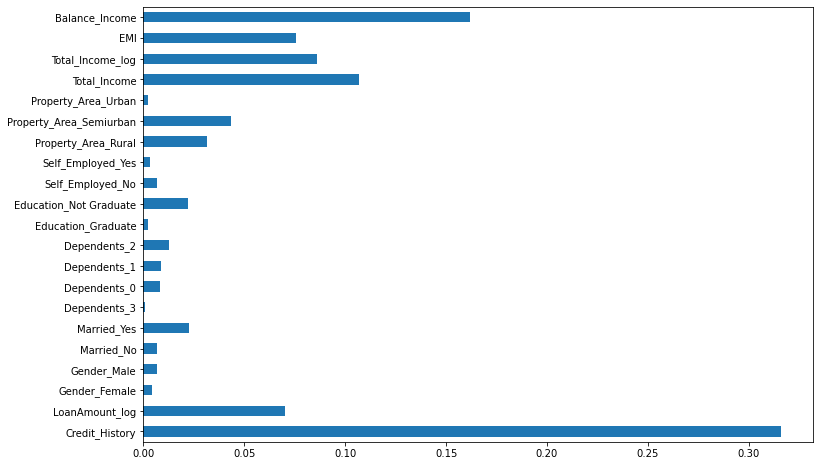

In [79]:
imp = pd.Series(model.feature_importances_, index = X.columns)
imp.plot(kind = 'barh', figsize = (12,8))

# 4. XGBoost Model

In [80]:
from xgboost import XGBClassifier # importing library for XGBoost

i = 1
skf = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)
for train_index, test_index in skf.split(X,y):
    print('\n{} of kFold {}'.format(i,skf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    model = XGBClassifier(random_state = 1) # Creating model for XGBoost
    model.fit(xtr, ytr) # model fiting
    pred_test = model.predict(xvl) # predicting x_validation
    score = accuracy_score(yvl, pred_test) # calculating accuracy score for y_validation
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(df2)
    pred3 = model.predict_proba(df2)[:, 1]
    

# mean validation acuracy  for this model is 0.7557


1 of kFold 5
accuracy_score 0.7886178861788617

2 of kFold 5
accuracy_score 0.7479674796747967

3 of kFold 5
accuracy_score 0.7560975609756098

4 of kFold 5
accuracy_score 0.7560975609756098

5 of kFold 5
accuracy_score 0.7295081967213115


In [81]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test["Loan_ID"]

# converting 1 & 0  to Y and N
submission["Loan_Status"].replace(0,'N', inplace = True)
submission["Loan_Status"].replace(1,'Y', inplace = True)

# converting to csv file
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("XGBoost.csv")